#Heart Disease Detection

##Importing essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading The Dtaset

In [3]:
df=pd.read_csv('./drive/MyDrive/Heart_Disease_Dataset/heart.csv')

Exploring the data

In [4]:
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
923,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
924,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
925,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
926,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
927,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
928,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
929,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
930,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0
931,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
932,42,F,NAP,115,211,0,ST,137,N,0.0,Up,0


#Features


1.   Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

# Target
* HeartDisease: output class [1: heart disease, 0: Normal]





Size and the shape of the data

In [6]:
df.shape

(933, 12)

Essential Values of the dataset

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,53.375134,132.389068,199.311897,0.229368,136.808146,0.880600,0.549839
std,9.455152,18.439548,108.731894,0.420652,25.429374,1.062933,0.497777
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Check for missing Values

In [8]:
missing_count = df.isnull().sum()
print(missing_count)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


##So there is no missing Values in this dataset

Checking duplicate rows

In [9]:
df1 = df[~df.duplicated()]
print(df.shape)
print(df1.shape)

(933, 12)
(918, 12)


As we can see here,there are some duplicate rows in the dataset

> Removing Duplicate rows and form a unique row dataset

In [10]:
df = df[~df.duplicated()]
print(df.shape)

(918, 12)


Checking Unique values of each variable

In [11]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

##So we can see that

* Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease are **Categorical variables**
* Age, RestingBP, Cholesterol, MaxHR, Oldpeak are **Numerical Variables**

Counts of categorical variables

In [12]:
categorical_variables = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for t in categorical_variables:
  print(df[t].value_counts().reset_index(name='Count'))
  print()


  Sex  Count
0   M    725
1   F    193

  ChestPainType  Count
0           ASY    496
1           NAP    203
2           ATA    173
3            TA     46

   FastingBS  Count
0          0    704
1          1    214

  RestingECG  Count
0     Normal    552
1        LVH    188
2         ST    178

  ExerciseAngina  Count
0              N    547
1              Y    371

  ST_Slope  Count
0     Flat    460
1       Up    395
2     Down     63



##Here are some plots of the data counts for Categorical Variables

<Axes: xlabel='Sex'>

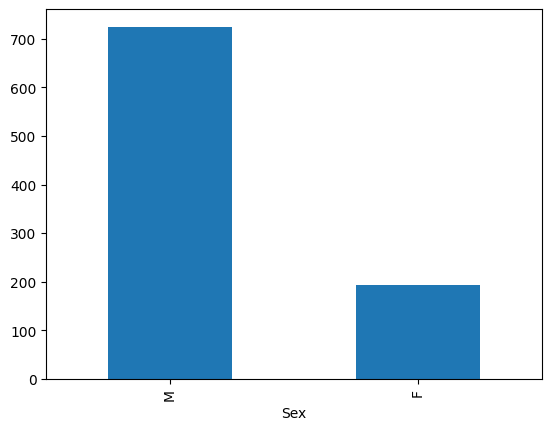

In [ ]:
df.Sex.value_counts().plot(kind='bar')

<Axes: xlabel='ChestPainType'>

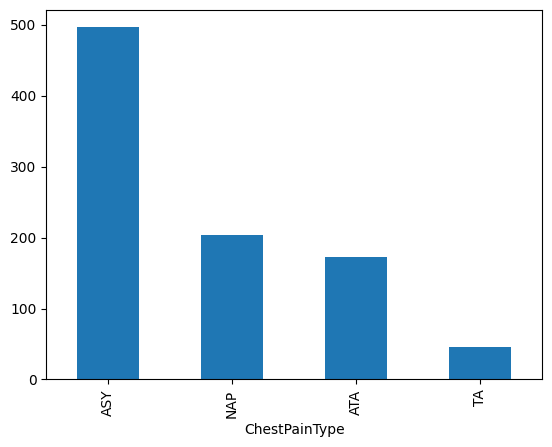

In [ ]:
df.ChestPainType.value_counts().plot(kind='bar')

<Axes: xlabel='FastingBS'>

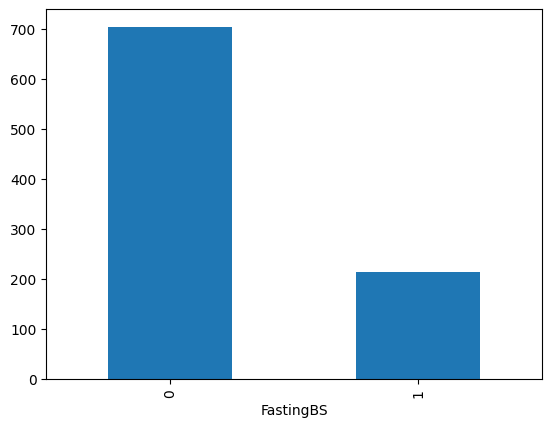

In [ ]:
df.FastingBS.value_counts().plot(kind='bar')

###As we can see in the data of the dataset,Some data have String values for data.We have to encode them in order to identify them to the model.

In [ ]:
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0
5,39,1,1,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,0,140,207,0,0,130,1,1.5,0,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [13]:
# Filter the DataFrame for rows where 'Cholesterol' is between 0 and 1
filtered_rows = df[(df['Cholesterol'] >= 0) & (df['Cholesterol'] <= 150)]

# Generate random values between 0 and 150 for replacement
random_values = np.random.uniform(0, 150, size=len(filtered_rows))

# Replace the values in the DataFrame with the generated random values
df.loc[(df['Cholesterol'] >= 0) & (df['Cholesterol'] <= 150), 'Cholesterol'] = random_values


#Data visualization for Numerical Variables

In [14]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

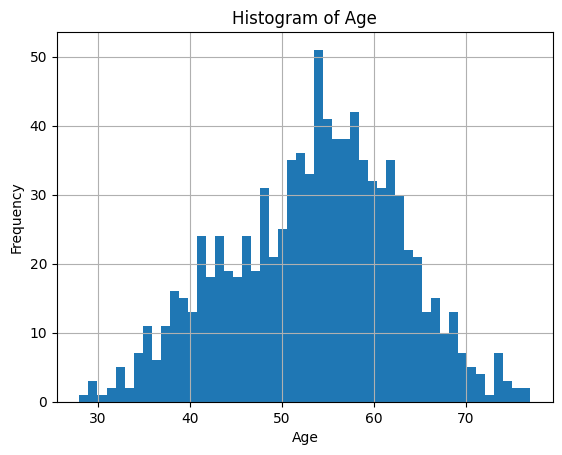

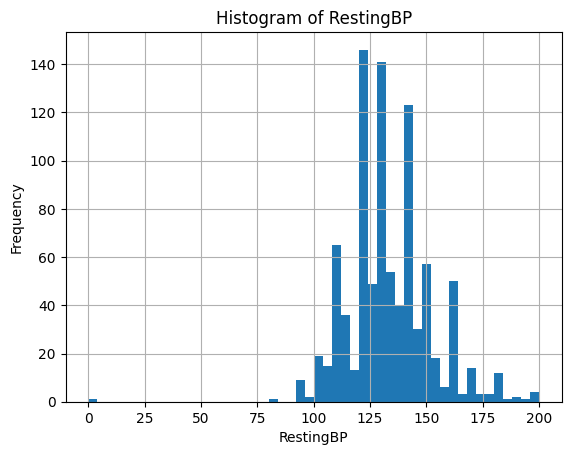

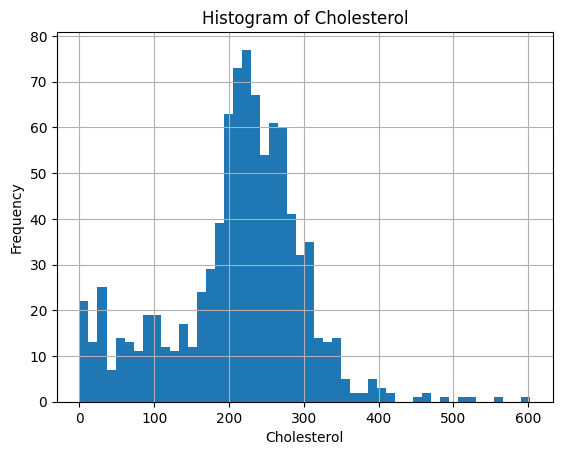

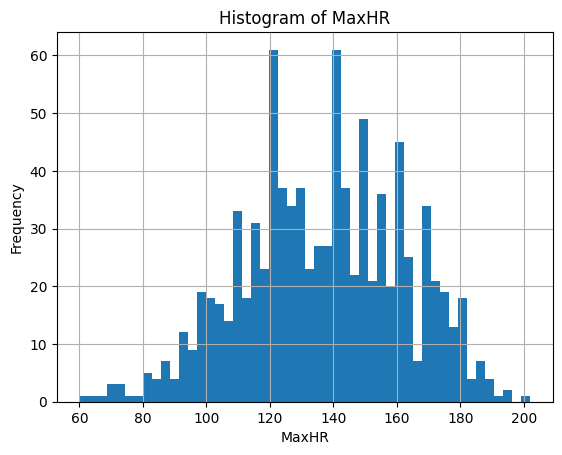

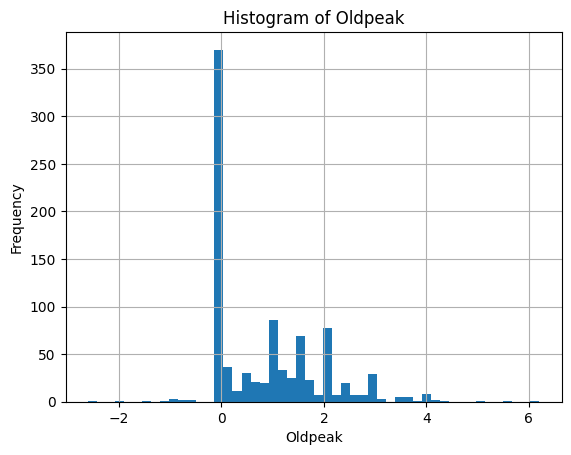

In [15]:
for numeric_Val in numeric_columns:
    plt.figure()
    df[numeric_Val].hist(bins=50)
    plt.title("Histogram of " + numeric_Val)
    plt.xlabel(numeric_Val)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


##By seeing those plot we can see that there are some outliers in some varibles.
These outliers may lead our model to bad predictions,So its better to get rid of them before continuing to modelling


we wish to use Techniques like IQR method to remove outliers from the variables.

> ## Removing Outliers By the IQR method

In [16]:
# IQR Method for TRemoving Outliers
import pandas as pd
numeric_columns = ['Age', 'RestingBP', 'Cholesterol','MaxHR', 'Oldpeak']
def remove_outliers_iqr(dataset, numerical_variables):
    cleaned_dataset = dataset.copy()  # Make a copy of the dataset to avoid modifying the original dataset

    for variable in numerical_variables:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = cleaned_dataset[variable].quantile(0.25)
        Q3 = cleaned_dataset[variable].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = cleaned_dataset[(cleaned_dataset[variable] < lower_bound) | (cleaned_dataset[variable] > upper_bound)]
        print(variable, outliers)
        # Remove outliers
        cleaned_dataset = cleaned_dataset[(cleaned_dataset[variable] >= lower_bound) & (cleaned_dataset[variable] <= upper_bound)]

        # Print information about the removed outliers
        if not outliers.empty:
            print(f"Removed {len(outliers)} outliers from variable '{variable}'.")

    return cleaned_dataset
df = remove_outliers_iqr(df,numeric_columns)
df.shape
# Example usage:
# cleaned_data = remove_outliers_iqr(your_dataset, ['numerical_var1', 'numerical_var2', ...])


Age Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
RestingBP      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190   241.000000          0     Normal   
123   58   F           ATA        180   393.000000          0     Normal   
189   53   M           ASY        180   285.000000          0         ST   
190   46   M           ASY        180   280.000000          0         ST   
241   54   M           ASY        200   198.000000          0     Normal   
274   45   F           ATA        180   295.000000          0     Normal   
275   59   M           NAP        180   213.000000          0     Normal   
278   57   F           ASY        180   347.000000          0         ST   
314   53   M           ASY         80    51.203566          0     Normal   
365   64   F           ASY        200    32.966445          0 

(808, 12)

Analysis How each Numerical Variable is affected

12 outliers from variable 'Oldpeak

---

70 outliers from variable 'Cholesterol'

---
28 outliers from variable 'RestingBP'

---



In [ ]:
count = (df[(df['Age'] > 50) & (df['HeartDisease'] == 1)])

chestPainTypes = len(df[(df['ChestPainType']=='TA') & (df['HeartDisease']==1)])
chestPainTypes*100/46
BPcheckNormal = len(df[(df['RestingBP'] > 140)])
print(BPcheckNormal)



190


Analysis about how each numerical Feature is affected

Age

I. Lowest age recorded was 28, Highest age recorded was 77.

Taking Criterias as Age < 50, 80 > Age > 50

Age <= 50 and Heart Disease == 1

Entries = 125

Age <= 50 and Heart Disease == 0

Entries = 191

80 > Age > 50 and Heart Disease == 1

Entries = 383

80 > Age > 50 and Heart Disease == 0

Entries = 219

By this we can see that Elderly people are more tends to be having a Heart Disease

In [ ]:
Women = len(df[(df['Sex']=='F')])

WomenCount55 = len(df[(df['Sex']=='F') & (df['Age'] >= 55)])
print(Women)
print(WomenCount55)

182
68


In [ ]:
dfHeartDisease = df[(df['HeartDisease']==1)]
Perc=len(dfHeartDisease)
# print(Perc)
MaleCount = len(dfHeartDisease[(dfHeartDisease['Sex']=='M')])
WomenCount = len(dfHeartDisease[(dfHeartDisease['Sex']=='F') & (dfHeartDisease['Age'] >= 55)])

# print(WomenCount)
# Chest Pain Counts
ChestPainCount_TA = len(dfHeartDisease[(dfHeartDisease['ChestPainType']=='TA')])
ChestPainCount_ATA = len(dfHeartDisease[(dfHeartDisease['ChestPainType']=='ATA')])
ChestPainCount_NAP = len(dfHeartDisease[(dfHeartDisease['ChestPainType']=='NAP')])
ChestPainCount_ASY = len(dfHeartDisease[(dfHeartDisease['ChestPainType']=='ASY')])

ChestPainCountNormal_TA = len(df[(df['ChestPainType'] == 'TA')])
ChestPainCountNormal_ATA = len(df[(df['ChestPainType'] == 'ATA')])
ChestPainCountNormal_NAP = len(df[(df['ChestPainType'] == 'NAP')])
ChestPainCountNormal_ASY = len(df[(df['ChestPainType'] == 'ASY')])

print(ChestPainCount_TA*100/ChestPainCountNormal_TA)
print(ChestPainCount_ATA*100/ChestPainCountNormal_ATA)
print(ChestPainCount_NAP*100/ChestPainCountNormal_NAP)
print(ChestPainCount_ASY*100/ChestPainCountNormal_ASY)

#Age and Sex
AgeCount = len(dfHeartDisease[(dfHeartDisease['Age'] > 50)])
# MenWith45 = len(dfHeartDisease[(dfHeartDisease['Age'] > 45) & (dfHeartDisease['Sex']=='M')])
WomenWith55 = len(dfHeartDisease[(dfHeartDisease['Age'] > 55) & (dfHeartDisease['Sex']=='F')])

Men = len(df[(df['Age'] >= 45) & (df['Sex']=='M')])
MenWith45 = len(dfHeartDisease[(dfHeartDisease['Age'] >= 45) & (dfHeartDisease['Sex']=='M')])

# print((MenWith45*100/Men))


# #Resting BP check
# BPcheckNormal = len(df[(df['RestingBP'] > 140)])
# print(BPcheckNormal)
# BPcheck = len(dfHeartDisease[(dfHeartDisease['RestingBP'] > 140)])
# print(BPcheck*100/BPcheckNormal)

# # Chrolestrol
# Chloestrols = len(df[(df['Cholesterol'] < 100)])
# print(Chloestrols)
# ChloestrolsHD = len(dfHeartDisease[(dfHeartDisease['Cholesterol'] < 100)])
# print(ChloestrolsHD)
# print(ChloestrolsHD*100/Chloestrols)

# # FastingBS
# FastingBS1 = len(df[(df['FastingBS'] == 1)])
# print(FastingBS1)
# FastingBS1HD = len(dfHeartDisease[(dfHeartDisease['FastingBS'] == 1)])
# print(FastingBS1HD)
# print(FastingBS1HD*100/FastingBS1)

# # RestingECG
# RestingECG1 = len(df[(df['RestingECG'] == 'LVH')])
# print(RestingECG1)
# RestingECG_HD = len(dfHeartDisease[(dfHeartDisease['RestingECG'] == 'LVH')])
# print(RestingECG_HD)
# print(RestingECG_HD*100/RestingECG1)

# # ExerciseAngina
# ExerciseAngina1 = len(df[(df['ExerciseAngina'] == 'Y')])
# print(ExerciseAngina1)
# ExerciseAngina_HD = len(dfHeartDisease[(dfHeartDisease['ExerciseAngina'] == 'Y')])
# print(ExerciseAngina_HD)
# print(ExerciseAngina_HD*100/ExerciseAngina1)

# #Oldpeak
# Oldpeak1 = len(df[(df['Oldpeak'] == 'Y')])
# print(Oldpeak1)
# Oldpeak_HD = len(dfHeartDisease[(dfHeartDisease['Oldpeak'] == 'Y')])
# print(Oldpeak_HD)
# print(Oldpeak_HD*100/Oldpeak1)

# #ST_Slope
# ST_Slope1 = len(df[(df['ST_Slope'] == 'Up')])
# print(ST_Slope1)
# ST_Slope_HD = len(dfHeartDisease[(dfHeartDisease['ST_Slope'] == 'Up')])
# print(ST_Slope_HD)
# print(ST_Slope_HD*100/ST_Slope1)

41.86046511627907
11.656441717791411
33.333333333333336
77.17647058823529


In [ ]:
selected_df = df.loc[df['RestingECG'] == 'ST', ['RestingECG', 'HeartDisease']]
selected_df

In [ ]:
df.iloc[2]


In [ ]:
df1 = len(df[(35 <= df['Age']) & (df['Age'] <= 44) & (df['Sex'] == 'M') & (df['HeartDisease']==1)])
df1


In [ ]:
ChloestrolsCheck = len(df[(df['Cholesterol'] > -1) & (df['Cholesterol']<2)])
# ChloestrolsCheck
checkingValuesforCT = df[(df['Cholesterol'] > -1) & (df['Cholesterol'] < 2)]['Cholesterol']
checkingValuesforCT

293    0
294    0
295    0
296    0
297    0
      ..
514    0
515    0
518    0
535    0
536    0
Name: Cholesterol, Length: 161, dtype: int64

In [ ]:
df1 = df

> ## Feature Generation

## Numerical Columns

numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

---

## Age and Sex
Male

(0-30] Male as youngMale,

(30-45] Male as middleMale

(45-60] Male as oldMale

(60-80] Male as ElderlyMale

(80-inf) Male as veryOldMale

Female

(0-30] Female as youngFemale

(30-45) Female as middleFemale

(45-60] Female as oldFemale

(60-80] Female as ElderlyFemale

(80-inf) Female as veryOldFemale

In [20]:
# Define the age bins and labels
age_bins = [0, 30, 45, 60, 80, float('inf')]
age_labels = ['young', 'middle', 'old', 'Elderly', 'veryOld']

# Bin the 'Age' column into the specified age groups
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Map the 'Sex' column to the specified categories
sex_mapping = {'M': 'Male', 'F': 'Female'}
df['sex_category'] = df['Sex'].map(sex_mapping)

df['sexCrossAge'] = df['age_group'].str.cat(df['sex_category'], sep=' ')

df.drop(columns=['age_group', 'sex_category'], inplace=True)

print(df)




In [21]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_group,sex_category,sexCrossAge
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,middle,Male,middle Male
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,old,Female,old Female
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,middle,Male,middle Male
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,old,Female,old Female
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,old,Male,old Male
5,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0,middle,Male,middle Male
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,old,Female,old Female
7,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0,old,Male,old Male
8,37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1,middle,Male,middle Male
9,48,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0,old,Female,old Female


Resting_BP Categorization

In [27]:
def categorize_blood_pressure(RestingBP):
    if RestingBP < 90:
        return "Low"
    elif 90 <= RestingBP <= 120:
        return "Normal"
    else:
        return "High"

In [28]:
df['blood_pressure_group'] = df['RestingBP'].apply(categorize_blood_pressure)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCrossSex,blood_pressure_group
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,middle Male,High
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,old Female,High
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,middle Male,High
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,old Female,High
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,old Male,High


> By reasearching Some Papers and Getting medical Knowledge From the Doctor categogorize the Cholestrol values as follows

In [30]:
def categorize_cholesterol(Cholesterol):
    if Cholesterol < 195:
        return "Desirable"
    elif 195 <= Cholesterol <= 240:
        return "High Cholesterol"
    else:
        return "Excessive Cholestrol"

In [31]:
df['Cholestoral_group'] = df['Cholesterol'].apply(categorize_cholesterol)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCrossSex,blood_pressure_group,Cholestoral_group
0,40,M,ATA,140,289.000000,0,Normal,172,N,0.0,Up,0,middle Male,High,Excessive Cholestrol
1,49,F,NAP,160,180.000000,0,Normal,156,N,1.0,Flat,1,old Female,High,Desirable
2,37,M,ATA,130,283.000000,0,ST,98,N,0.0,Up,0,middle Male,High,Excessive Cholestrol
3,48,F,ASY,138,214.000000,0,Normal,108,Y,1.5,Flat,1,old Female,High,High Cholesterol
4,54,M,NAP,150,195.000000,0,Normal,122,N,0.0,Up,0,old Male,High,High Cholesterol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.000000,0,Normal,132,N,1.2,Flat,1,old Male,Normal,Excessive Cholestrol
914,68,M,ASY,144,193.000000,1,Normal,141,N,3.4,Flat,1,Elderly Male,High,Desirable
915,57,M,ASY,130,143.850458,0,Normal,115,Y,1.2,Flat,1,old Male,High,Desirable
916,57,F,ATA,130,236.000000,0,LVH,174,N,0.0,Flat,1,old Female,High,High Cholesterol


normal value - 60 - 120
less than 60
more than 120

In [32]:
def Max_Heart_Rate(MaxHR):
    if 60 <MaxHR < 100:
        return "Normal"
    elif 100 <= MaxHR <= 200:
        return "High MaxHR"
    else:
        return "Excessive MaxHR"

In [33]:
df['HR_Groups'] = df['MaxHR'].apply(Max_Heart_Rate)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCrossSex,blood_pressure_group,Cholestoral_group,HR_Groups
0,40,M,ATA,140,289.000000,0,Normal,172,N,0.0,Up,0,middle Male,High,Excessive Cholestrol,High MaxHR
1,49,F,NAP,160,180.000000,0,Normal,156,N,1.0,Flat,1,old Female,High,Desirable,High MaxHR
2,37,M,ATA,130,283.000000,0,ST,98,N,0.0,Up,0,middle Male,High,Excessive Cholestrol,Normal
3,48,F,ASY,138,214.000000,0,Normal,108,Y,1.5,Flat,1,old Female,High,High Cholesterol,High MaxHR
4,54,M,NAP,150,195.000000,0,Normal,122,N,0.0,Up,0,old Male,High,High Cholesterol,High MaxHR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.000000,0,Normal,132,N,1.2,Flat,1,old Male,Normal,Excessive Cholestrol,High MaxHR
914,68,M,ASY,144,193.000000,1,Normal,141,N,3.4,Flat,1,Elderly Male,High,Desirable,High MaxHR
915,57,M,ASY,130,143.850458,0,Normal,115,Y,1.2,Flat,1,old Male,High,Desirable,High MaxHR
916,57,F,ATA,130,236.000000,0,LVH,174,N,0.0,Flat,1,old Female,High,High Cholesterol,High MaxHR


In [35]:
df[(df['ST_Slope'] == 'Down')]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCrossSex,blood_pressure_group,Cholestoral_group,HR_Groups
247,48,M,ASY,122,275.000000,1,ST,150,Y,2.0,Down,1,old Male,High,Excessive Cholestrol,High MaxHR
303,62,F,ASY,120,68.646854,1,ST,123,Y,1.7,Down,1,Elderly Female,Normal,Desirable,High MaxHR
307,53,M,ATA,130,122.496410,0,ST,120,N,0.7,Down,0,old Male,High,Desirable,High MaxHR
309,57,M,ASY,95,136.443194,1,Normal,182,N,0.7,Down,1,old Male,Normal,Desirable,High MaxHR
325,42,M,ASY,105,105.046741,1,Normal,128,Y,-1.5,Down,1,middle Male,Normal,Desirable,High MaxHR
339,64,F,ASY,95,117.846923,1,Normal,145,N,1.1,Down,1,Elderly Female,Normal,Desirable,High MaxHR
340,43,M,ASY,100,60.582222,1,Normal,122,N,1.5,Down,1,middle Male,Normal,Desirable,High MaxHR
341,64,M,ASY,110,141.050536,1,Normal,114,Y,1.3,Down,1,Elderly Male,Normal,Desirable,High MaxHR
352,56,M,ASY,120,132.920382,0,ST,100,Y,-1.0,Down,1,old Male,Normal,Desirable,High MaxHR
418,60,M,ASY,132,218.000000,0,ST,140,Y,1.5,Down,1,Elderly Male,High,High Cholesterol,High MaxHR


Oldpeak values are in between 0 and 6

In [38]:
df.drop(columns=['AgeCrossSex'], inplace=True)
# Define the age bins and labels
age_bins = [0, 30, 45, 60, 80, float('inf')]
age_labels = ['young', 'middle', 'old', 'Elderly', 'veryOld']

# Bin the 'Age' column into the specified age groups
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Map the 'Sex' column to the specified categories
sex_mapping = {'M': 'Male', 'F': 'Female'}
df['sex_category'] = df['Sex'].map(sex_mapping)

df['AgeCrossSex'] = df['age_group'].str.cat(df['sex_category'], sep=' ')

df.drop(columns=['age_group', 'sex_category'], inplace=True)

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,blood_pressure_group,Cholestoral_group,HR_Groups,AgeCrossSex
0,40,M,ATA,140,289.000000,0,Normal,172,N,0.0,Up,0,High,Excessive Cholestrol,High MaxHR,middle Male
1,49,F,NAP,160,180.000000,0,Normal,156,N,1.0,Flat,1,High,Desirable,High MaxHR,old Female
2,37,M,ATA,130,283.000000,0,ST,98,N,0.0,Up,0,High,Excessive Cholestrol,Normal,middle Male
3,48,F,ASY,138,214.000000,0,Normal,108,Y,1.5,Flat,1,High,High Cholesterol,High MaxHR,old Female
4,54,M,NAP,150,195.000000,0,Normal,122,N,0.0,Up,0,High,High Cholesterol,High MaxHR,old Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.000000,0,Normal,132,N,1.2,Flat,1,Normal,Excessive Cholestrol,High MaxHR,old Male
914,68,M,ASY,144,193.000000,1,Normal,141,N,3.4,Flat,1,High,Desirable,High MaxHR,Elderly Male
915,57,M,ASY,130,143.850458,0,Normal,115,Y,1.2,Flat,1,High,Desirable,High MaxHR,old Male
916,57,F,ATA,130,236.000000,0,LVH,174,N,0.0,Flat,1,High,High Cholesterol,High MaxHR,old Female


One hot encoding for all the values

In [63]:
from sklearn.preprocessing import OneHotEncoder

Categorical_coulmns_with_multiple_uniques = ['ChestPainType','RestingECG','ST_Slope']
OneHotEncoding = OneHotEncoder(sparse_output=False, drop='first')

Encoded_df = pd.DataFrame(OneHotEncoding.fit_transform(df[Categorical_coulmns_with_multiple_uniques]), columns = OneHotEncoding.get_feature_names_out())
Encoded_df

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
803,0.0,0.0,1.0,1.0,0.0,1.0,0.0
804,0.0,0.0,0.0,1.0,0.0,1.0,0.0
805,0.0,0.0,0.0,1.0,0.0,1.0,0.0
806,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
df=pd.read_csv('./updated_heart.csv')

youngMale
(30-45] Male as middleMale
(45-60] Male as oldMale
(60-inf] Male as ElderlyMale

(0-30] Female as youngFemale
(30-45) Female as middleFemale
(45-60] Female as oldFemale
(60-inf] Female as ElderlyFemale



> Encoding String values to Integer Values

In [52]:
df_Mapped = pd.DataFrame()
df_Mapped['AgeCrossSex'] = df['AgeCrossSex'].map({'young Male': 0, 'middle Male': 1, 'old Male': 2, 'Elderly Male': 3, 'young Female': 4, 'middle Female': 5, 'old Female': 6, 'Elderly Female': 7})
df_Mapped['Cholestoral_group'] = df['Cholestoral_group'].map({"Desirable": 0, "High Cholesterol": 1, "Excessive Cholestrol": 2})
df_Mapped['HR_Groups'] = df['HR_Groups'].map({"Normal": 0, "High MaxHR": 1, "Excessive MaxHR": 2})
df_Mapped['blood_pressure_group'] = df['blood_pressure_group'].map({"Low": 0, "Normal": 1, "High": 2})
df_Mapped['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df_Mapped['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df_Mapped.head()


,AgeCrossSex,Cholestoral_group,HR_Groups,blood_pressure_group,Sex,ExerciseAngina
0,1,2,1,2,1,0
1,6,0,1,2,0,0
2,1,2,0,2,1,0
3,6,1,1,2,0,1
4,2,1,1,2,1,0


In [57]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [59]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,blood_pressure_group,Cholestoral_group,HR_Groups,AgeCrossSex
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,High,Excessive Cholestrol,High MaxHR,middle Male
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,High,Desirable,High MaxHR,old Female
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,High,Excessive Cholestrol,Normal,middle Male
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,High,High Cholesterol,High MaxHR,old Female
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,High,High Cholesterol,High MaxHR,old Male


In [60]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol','MaxHR', 'Oldpeak']
df_numeric = df[numeric_columns]
df_numeric

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289.000000,172,0.0
1,49,160,180.000000,156,1.0
2,37,130,283.000000,98,0.0
3,48,138,214.000000,108,1.5
4,54,150,195.000000,122,0.0
...,...,...,...,...,...
803,45,110,264.000000,132,1.2
804,68,144,193.000000,141,3.4
805,57,130,143.850458,115,1.2
806,57,130,236.000000,174,0.0


In [55]:
for t in categorical_variables:
  print(df[t].value_counts().reset_index(name='Count'))
  print()

  Sex  Count
0   M    634
1   F    174

  ChestPainType  Count
0           ASY    420
1           NAP    181
2           ATA    166
3            TA     41

   FastingBS  Count
0          0    636
1          1    172

  RestingECG  Count
0     Normal    486
1        LVH    172
2         ST    150

  ExerciseAngina  Count
0              N    492
1              Y    316

  ST_Slope  Count
0     Flat    394
1       Up    369
2     Down     45



##Scaling Features
Scaling is important because it helps to bring all features to the same scale or range.
So any feature have no unwanted weight over another.

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_numeric), columns = scaler.get_feature_names_out())


> # Now we have scaled dataframe,Encoded Dataframe and mapped dataframe,We have to concatenate all the dataframes

In [66]:
Final_df = pd.concat([scaled_df, Encoded_df, df_numeric], axis=1)
Final_df.shape


(808, 17)

Saving the dataframe as a csv file

In [68]:
Final_df.to_csv('final_heart.csv', index=False)

##Correlation Matrix

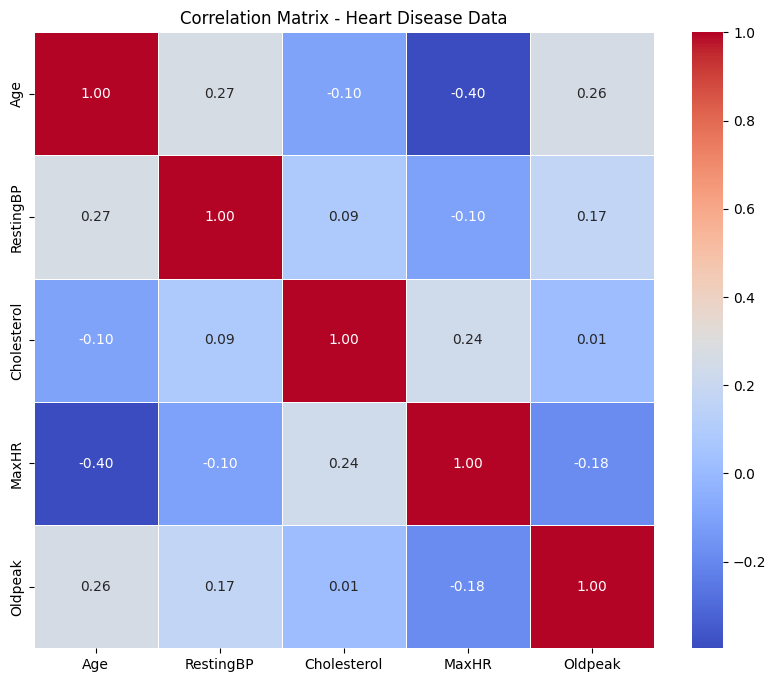

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Assuming your DataFrame representing heart disease data is named heart_disease_df
correlation_matrix_heart = df[numeric_columns].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_heart, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Heart Disease Data')
plt.savefig('heart_disease_correlation_mat.png')
plt.show()


As we can see in the corrrelation matrix there is no significant correlation among any feature in the dataset, **So it is essential to use all the Features for training.**